In [1]:
# Import libraries
import sys
import os
from compositionspace.datautils import DataPreparation
import json 
import pandas as pd
import matplotlib.pylab as plt
from compositionspace.segmentation import CompositionClustering
from compositionspace.postprocessing import PostprocessData

In [2]:
experiment_param = json.load(open("experiment_params.json","r"))
data = DataPreparation(params=experiment_param)
data.chunkify_apt_df("data")
data.get_voxels()
data.calculate_voxel_composition(data.voxel_files[0])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/23259 [00:00<?, ?it/s]

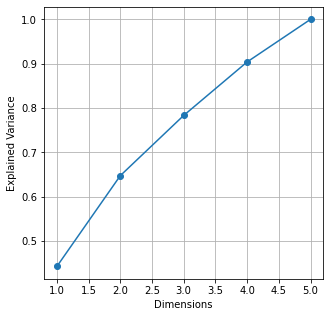

In [2]:
experiment_param = json.load(open("experiment_params.json","r"))
comps = CompositionClustering(params=experiment_param)
res = comps.get_PCA_cumsum("3Vox_ratios_filenames_num_MR_Grp.h5", "output/file_R31_06365-v02_pos_small_chunks_arr.h5")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  5.19it/s]


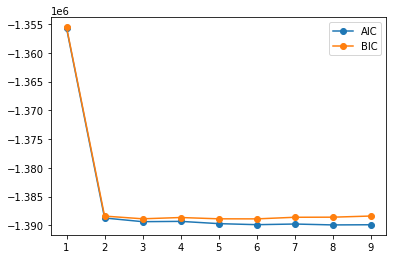

In [3]:
res = comps.get_bics_minimization("3Vox_ratios_filenames_num_MR_Grp.h5", "output/file_R31_06365-v02_pos_small_chunks_arr.h5")

In [4]:
ml_params = experiment_param["parameters"]["ml_models"]["GaussianMixture"]
comps.get_composition_clusters("3Vox_ratios_filenames_num_MR_Grp.h5", "output/file_R31_06365-v02_pos_small_chunks_arr.h5", ml_params, "out.h5")

[34, 51, 23174]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 23259/23259 [00:04<00:00, 5315.52it/s]


In [16]:
Composition_Space.plot3d()

/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_0
/u/gazal/APT_calculations/CompositionSpace_git/output/Output_voxel_cetroids_phases_1


In [17]:
Postprocess_data = Postprocess_data(params=experiment_param)


/u/gazal/APT_calculations/CompositionSpace_git/CompositionSpaceNFDI/compositionspace/postprocessing.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_cent["ID"] = [i]*len(cl_cent)
100%|██████████| 13/13 [00:00<00:00, 1644.23it/s]


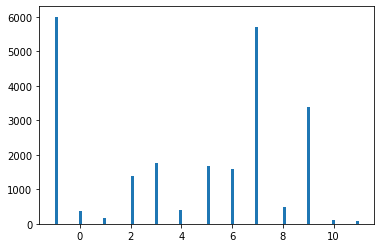

In [18]:
Postprocess_data.DBSCAN_clustering(cluster_id = 0,eps = 5., min_samples= 40,plot=True,plot3d=True,save=True)
